<a href="https://colab.research.google.com/github/BOrtizL/Proyecto-7-DataScience/blob/main/4_2_UDD_Proyecto_M7_Modelo_de_Regresi%C3%B3n_Log%C3%ADstica_bc_BarbaraOrtiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

**Cargar los datos de baja confianza transformados**

In [3]:
# Ruta del archivo original en Google Drive
ruta_archivo_drive = "/content/drive/My Drive/Proyecto 7/raw/df_concatenado_baja_confianza.pickle"

# Cargar el DataFrame desde el archivo
with open(ruta_archivo_drive, 'rb') as f:
    df_concatenado_baja_confianza = pickle.load(f)

In [4]:
# Paso 1: Separar las características y la etiqueta
X = df_concatenado_baja_confianza.drop('gender', axis=1)
y = df_concatenado_baja_confianza['gender']

**Observación:**
La variable objetivo será predecir el género de quién ganará un oscar.

In [5]:
# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Paso 3: Preprocesamiento - Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Aplicar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(X_train_scaled)

PCA()

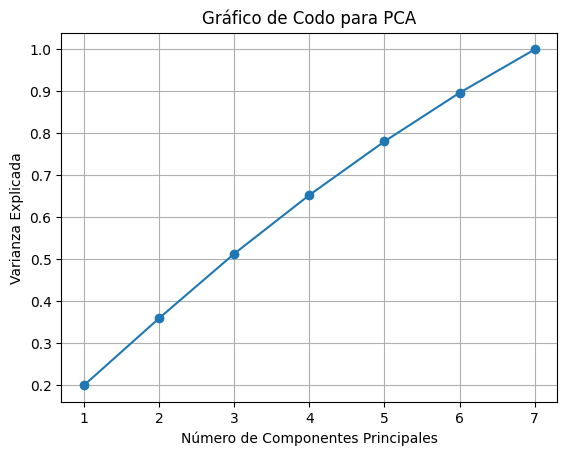

In [7]:
# Paso 4: Varianza explicada por cada componente
explained_variance_ratio_bc = pca.explained_variance_ratio_

# Calcular el número de componentes principales
n_components1 = len(explained_variance_ratio_bc)

# Crear un gráfico de codo
cumulative_variance1 = np.cumsum(explained_variance_ratio_bc)
plt.plot(range(1, n_components1 + 1), cumulative_variance1, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Codo para PCA')
plt.grid(True)
plt.show()

In [8]:
# Paso 4: Aplicar PCA en el conjunto de entrenamiento
pca = PCA(n_components=7)  # Número óptimo de componentes
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [9]:
# Paso 5: Entrenar el modelo con los datos transformados por PCA
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Paso 6: Evaluar el modelo
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.9518072289156626
              precision    recall  f1-score   support

           1       0.98      0.95      0.96        57
           2       0.89      0.96      0.93        26

    accuracy                           0.95        83
   macro avg       0.94      0.95      0.95        83
weighted avg       0.95      0.95      0.95        83



**Obserevación:**
95% de precisión es bastante bueno. El modelo está funcionando bastante bien en el conjunto de prueba. A continuación indico algunas observaciones basadas en el informe de clasificación:

- Precision y Recall altos: Para ambas clases, la precisión y el recall son bastante altos, lo que indica que el modelo está prediciendo correctamente tanto los positivos como los negativos.

- F1-score alto: El puntaje F1, que es la media armónica entre precisión y recall, también es alto para ambas clases, lo que sugiere un buen equilibrio entre precisión y recall.

- Accuracy: La precisión global del modelo es del 95%, lo cual es excelente.


In [10]:
# Ruta donde se guardará el archivo en Google Drive
file_path = '/content/drive/My Drive/logistic_regression_model_bc.pickle'

# Guardar el modelo en un archivo pickle en Google Drive
with open(file_path, 'wb') as f:
    pickle.dump(model, f)